## Задание 1

Импортируем библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Загружаем "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

Создаём датафреймы X и y из этих данных.

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбиваем эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state был равен 42.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируем данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Строим модель TSNE на тренировочных данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [9]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

X_train_tsne.shape

(404, 2)

Строим диаграмму рассеяния на полученных данных.

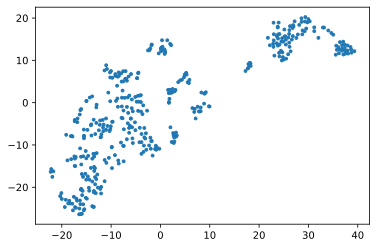

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=8)

plt.show()

##Задание 2

С помощью KMeans разбиваем данные из тренировочного набора на 3 кластера,
используем все признаки из датафрейма X_train.

Параметр max_iter будет равен 100, random_state 42.

In [19]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

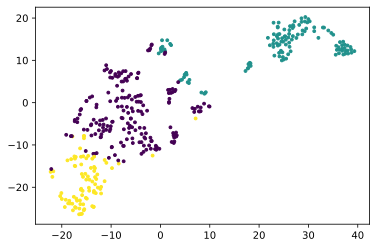

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, s=8)

plt.show()

Вычисляем средние значения price и CRIM в разных кластерах.

In [38]:
# Средние значения print
print('Кластер 1: ', y_train[labels_train==0].mean())
print('Кластер 2: ', y_train[labels_train==1].mean())
print('Кластер 3: ', y_train[labels_train==2].mean())

Кластер 1:  24.958115183246072
Кластер 2:  16.165354330708663
Кластер 3:  27.78837209302326


In [39]:
# Средние значения CRIM
print('Кластер 1: ', X_train.loc[labels_train == 0, 'CRIM'].mean())
print('Кластер 2: ', X_train.loc[labels_train == 1, 'CRIM'].mean())
print('Кластер 3: ', X_train.loc[labels_train == 2, 'CRIM'].mean())

Кластер 1:  0.42166020942408367
Кластер 2:  10.797028425196853
Кластер 3:  0.07356558139534886
